Association rules

In [2]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [48]:
def dict2str(item_dict):
    stringa = ""
    for key in item_dict.keys():
        item_str= " {}:{} ".format(key,item_dict[key])
        stringa+=item_str
    return stringa


In [3]:
from ggplot import *

# Numero di regole in funzione di supp e conf

## numero di regole per supp=20

In [4]:
supp=20
conf_range=np.arange(50,105,5)
Nrules_supp20 = []
for i,conf in enumerate(conf_range):
    df=pd.read_csv("../../data/rules/rules_supp{}_conf{}.csv".format(supp,conf))
#    df=df.query('Lift>1')
    Nrules_supp20.append(df.shape[0])
Nrules_supp20


[268, 241, 224, 220, 204, 191, 177, 135, 100, 94, 8]

In [5]:
## numero di regole per supp=10

In [6]:
supp=10
conf_range=np.arange(50,105,5)
Nrules_supp10 = []
for i,conf in enumerate(conf_range):
    df=pd.read_csv("../../data/rules/rules_supp{}_conf{}.csv".format(supp,conf))
#    df=df.query('Lift>1')
    Nrules_supp10.append(df.shape[0])
Nrules_supp10


[1480, 1339, 1240, 1191, 1098, 1062, 1007, 787, 650, 575, 69]

In [9]:
## numero di regole per supp=5

In [10]:
supp=5
conf_range=np.arange(50,105,5)
Nrules_supp5 = []
for i,conf in enumerate(conf_range):
    df=pd.read_csv("../../data/rules/rules_supp{}_conf{}.csv".format(supp,conf))
#    df=df.query('Lift>1')
    Nrules_supp5.append(df.shape[0])
Nrules_supp5


[6129, 5627, 5211, 4841, 4556, 4406, 4236, 3417, 2984, 2584, 289]

# Grafico numero di regole

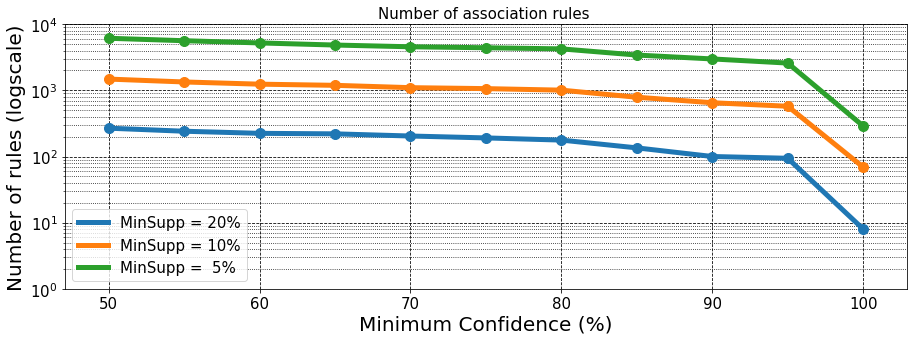

In [11]:
###########################################################
SMALL_SIZE = 15
MEDIUM_SIZE = 20
BIGGER_SIZE = 30
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y label
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rc('axes', axisbelow=True)
###########################################################

fig = plt.figure(figsize=(13,5))
ax = fig.add_subplot(111)
plt.plot(conf_range,Nrules_supp20, label='MinSupp = 20%', linewidth=5)
plt.plot(conf_range,Nrules_supp10, label='MinSupp = 10%', linewidth=5)
plt.plot(conf_range,Nrules_supp5, label='MinSupp =  5%', linewidth=5)
plt.scatter(conf_range,Nrules_supp20,s=100)
plt.scatter(conf_range,Nrules_supp10,s=100)
plt.scatter(conf_range,Nrules_supp5,s=100)

plt.legend()

ax.set_yscale('log')

plt.xlabel('Minimum Confidence (%)')
plt.ylabel('Number of rules (logscale)')

plt.ylim(1,10000)

plt.grid(b=True, which='major', color='0', linestyle='--')
plt.grid(b=True, which='minor', color='0', linestyle=':')

plt.title("Number of association rules ")
plt.tight_layout()

plt.savefig("../../images/rules/andamentonumero.pdf")


In [12]:
###########################################################

SMALL_SIZE = 15
MEDIUM_SIZE = 20
BIGGER_SIZE = 30

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y label
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rc('axes', axisbelow=True)
###########################################################

In [13]:
# funzione per convertire nome items

var_dict = {
    'T':'Time_Spend_Company',
    'D':'Department',
    'NP':'Number_Projects',
    'P':'Promotion_Last_5_Years',
    'L':'Left',
    'H':'Average_Montly_Hours',
    'WA':'Work_Accident',
    'LE':'Last_Evaluation',
    'S':'Salary',
    'SL':'Satisfaction_Level'
}

def item2dict(item):
    ## splitto la stringa
    item_split = item.split('_')
    # definisco la lista variabile,valore
    item_list = {var_dict[item_split[1]] : item_split[0]}
    return item_list




# regole generali

In [84]:
df = pd.read_csv("../../data/rules/rules_supp20_conf50.csv")
df.shape
#df_filtered = df.query('Supp>0.2') # perchè non è maggiore di 20???
#df_filtered = df_filtered.query('Lift>1')
df_general=df
df_general.describe()

             Supp        Conf        Lift
count  268.000000  268.000000  268.000000
mean     0.291754    0.819851    1.107687
std      0.102881    0.160973    0.261097
min      0.200000    0.500000    0.880000
25%      0.220000    0.710000    0.990000
50%      0.260000    0.850000    1.000000
75%      0.320000    0.980000    1.120000
max      0.840000    1.000000    2.070000

In [75]:
Cons_label=[]
df_general_plot=df_general.sort_values(by='Lift',ascending=False)

for i in range(df_general.shape[0]):
    Cons_label.append(dict2str(item2dict(df_general_plot.Consequent.iloc[i])))

df_general_plot['Consequent_']=Cons_label


df_general_plot.to_csv("../../code/rules/df_general.csv")



In [ ]:
## grafico con R, vedi script grafici.r

# vecchio grafico
"""
fig = plt.figure(figsize=(10,10))
plt.grid()
size= 5000*(df_general.Supp)**(2)
palette='Accent'
palette='viridis'


plt.scatter(x='Conf', y='Lift',data=df_general,s=size, alpha=0.7 ,c='Supp',cmap =plt.cm.get_cmap(palette,3))


cb = plt.colorbar(orientation='horizontal',extend='max',ticks=np.arange(0.20,0.70,0.10))
cb.set_label('Support')

plt.colorbar(extend='both')
plt.clim(0.2,0.5)
plt.xlabel('Confidence')
plt.ylabel('Lift')
plt.title("Interest of Association rules, for Min Supp = 20%")
#plt.legend()
plt.tight_layout()

plt.savefig("../../images/rules/rules_supp20.pdf")
"""

In [83]:
df_general_interesting = df_general.query(" Lift  > 1.5")
df_general_interesting = df_general_interesting.sort_values(by=['Conf','Consequent','Supp'],ascending=False)
import sys
stdout= sys.stdout
sys.stdout = open('../../data/rules/rules_supp20.txt','w')
print( df_general_interesting.to_latex(index=False) )
#print( df[100:300].to_latex(index=False) )
sys.stdout=stdout

#df.query(" Conf<0.7 & Lift >1.8")[0:1].to_latex(index_names=False) 

##?df.to_latex()
df_general.describe()

             Supp        Conf        Lift
count  268.000000  268.000000  268.000000
mean     0.291754    0.819851    1.107687
std      0.102881    0.160973    0.261097
min      0.200000    0.500000    0.880000
25%      0.220000    0.710000    0.990000
50%      0.260000    0.850000    1.000000
75%      0.320000    0.980000    1.120000
max      0.840000    1.000000    2.070000

In [23]:
# Regole per supp=5

In [24]:


df = pd.read_csv("../../data/rules/rules_supp5_conf50.csv")
df.shape
#df_filtered = df.query('Supp>0.2') # perchè non è maggiore di 20???
#df_filtered = df_filtered.query('Lift>1')
df_filtered=df
df_filtered.describe()


              Supp         Conf         Lift
count  6129.000000  6129.000000  6129.000000
mean      0.088240     0.836624     1.680235
std       0.056752     0.164570     1.149885
min       0.050000     0.500000     0.660000
25%       0.060000     0.690000     1.010000
50%       0.070000     0.890000     1.150000
75%       0.100000     0.980000     2.030000
max       0.840000     1.000000     7.240000

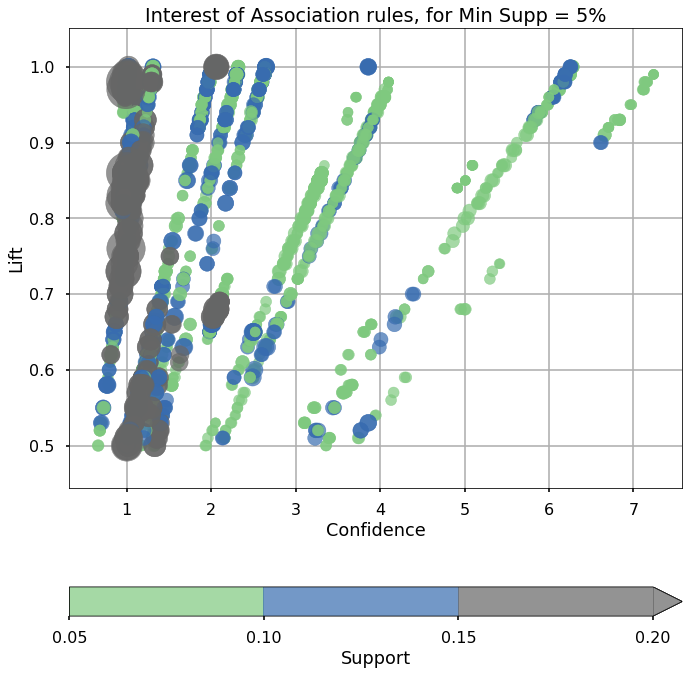

In [25]:
plt.close()
fig = plt.figure(figsize=(10,10))
plt.grid()
size= 2000*(df_filtered.Supp)**(1)
plt.scatter(x='Lift', y='Conf',data=df_filtered,s=size, alpha=0.7 ,c='Supp',cmap =plt.cm.get_cmap('Accent',3))

plt.clim(0.05,0.2)
cb = plt.colorbar(extend='max',orientation='horizontal',ticks=np.arange(0.05,0.70,0.05))
cb.set_label('Support')


plt.xlabel('Confidence')
plt.ylabel('Lift')
plt.title("Interest of Association rules, for Min Supp = 5%")
#plt.legend()
plt.tight_layout()

plt.savefig("../../images/rules/rules_supp5.pdf")

In [26]:
import seaborn as sns
sns.set_context("poster")
df_filtered.head()

  Consequent       Antecedent  Supp  Conf  Lift
0        N_P         ('7_D',)  0.05  0.98  1.00
1        N_P         ('6_D',)  0.05  0.97  0.99
2        N_P         ('5_D',)  0.05  0.95  0.97
3        N_P  ('4_D', 'N_WA')  0.05  1.00  1.02
4       N_WA   ('4_D', 'N_P')  0.05  0.85  1.00

In [47]:
def dict2str(item_dict):
    stringa = ""
    for key in item_dict.keys():
        item_str= " {}:{} ".format(key,item_dict[key])
        stringa+=item_str
    return stringa


In [28]:
#conf_min=0.6
df_plot = df_filtered.query("Lift>0.2 and Conf> 0.6 and Supp>0.01").sort_values(by=["Lift","Consequent"],ascending=False)

Cons_label=[]

for i in range(df_plot.shape[0]):
    Cons_label.append(dict2str(item2dict(df_plot.Consequent.iloc[i])))

df_plot['Cons_label']=Cons_label
df_plot.describe()

              Supp         Conf         Lift
count  5163.000000  5163.000000  5163.000000
mean      0.087951     0.890461     1.750056
std       0.057313     0.116383     1.212591
min       0.050000     0.610000     0.800000
25%       0.060000     0.830000     1.000000
50%       0.070000     0.950000     1.140000
75%       0.100000     0.990000     2.060000
max       0.840000     1.000000     7.240000

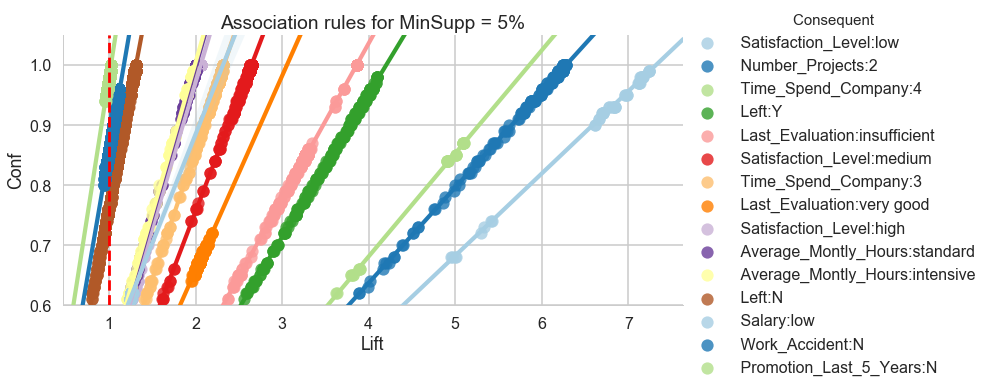

In [31]:
sns.set_style('whitegrid')

size= 2000*(df_filtered.Supp)**(1)

sns.set_palette("Paired")

"""
left_plot = sns.lmplot(x='Lift',y='Conf',data=df_plot,hue='Cons_label',fit_reg=True,
                       aspect=(20/10), scatter_kws={"s": 150},
                       legend_out=True,palette='Paired')
"""
#left_plot.map(plt.errorbar, "Lift", "Conf", "Supp", marker="o")

left_plot._legend.set_title("Consequent ")

plt.ylim(0.45,1.05)
plt.ylim(0.6,1.05)
#plt.xlim(0.5,8.1)

plt.axvline(1,color='r',linestyle="--")

sns.set_palette("Paired")
plt.title("Association rules for MinSupp = 5%")


left_plot.savefig("../../images/rules/left_scatter.pdf")
#plt.scatter(x='Conf', y='Lift',data=df_filtered,s=size, alpha=0.7 ,c='Consequent',cmap =plt.cm.get_cmap('Accent',3))




In [36]:
from ggplot import *

ImportError: No module named ggplot

In [17]:
df_plot.query("Conf>0.99").describe()
df_plot.head(100)

     Consequent                                         Antecedent  Supp  \
122      low_SL           ('4_T', 'Y_L', 'insufficient_LE', 'N_P')  0.05   
126      low_SL                  ('4_T', 'Y_L', 'insufficient_LE')  0.05   
112      low_SL   ('4_T', 'Y_L', 'insufficient_LE', 'N_WA', 'N_P')  0.05   
117      low_SL          ('4_T', 'Y_L', 'insufficient_LE', 'N_WA')  0.05   
151      low_SL          ('4_T', 'insufficient_LE', 'intensive_H')  0.05   
147      low_SL   ('4_T', 'insufficient_LE', 'intensive_H', 'N_P')  0.05   
187      low_SL   ('Y_L', 'insufficient_LE', 'intensive_H', 'N_P')  0.05   
191      low_SL          ('Y_L', 'insufficient_LE', 'intensive_H')  0.05   
156      low_SL          ('4_T', 'insufficient_LE', 'N_WA', 'N_P')  0.07   
160      low_SL                 ('4_T', 'insufficient_LE', 'N_WA')  0.07   
167      low_SL                         ('4_T', 'insufficient_LE')  0.07   
164      low_SL                  ('4_T', 'insufficient_LE', 'N_P')  0.07   
10       low

In [45]:
df_interesting = df_filtered.query(" Lift >5")
df_interesting = df_interesting.query(" Conf >0.95")
df_interesting = df_interesting.sort_values(by=['Consequent','Lift','Supp'],ascending=False)
df_interesting
#((df_interesting.Antecedent[665]))

     Consequent                                         Antecedent  Supp  \
122      low_SL           ('4_T', 'Y_L', 'insufficient_LE', 'N_P')  0.05   
126      low_SL                  ('4_T', 'Y_L', 'insufficient_LE')  0.05   
112      low_SL   ('4_T', 'Y_L', 'insufficient_LE', 'N_WA', 'N_P')  0.05   
117      low_SL          ('4_T', 'Y_L', 'insufficient_LE', 'N_WA')  0.05   
151      low_SL          ('4_T', 'insufficient_LE', 'intensive_H')  0.05   
147      low_SL   ('4_T', 'insufficient_LE', 'intensive_H', 'N_P')  0.05   
187      low_SL   ('Y_L', 'insufficient_LE', 'intensive_H', 'N_P')  0.05   
191      low_SL          ('Y_L', 'insufficient_LE', 'intensive_H')  0.05   
665        2_NP  ('Y_L', 'insufficient_LE', 'medium_SL', '3_T',...  0.09   
671        2_NP  ('Y_L', 'insufficient_LE', 'medium_SL', '3_T',...  0.09   
651        2_NP  ('Y_L', 'insufficient_LE', 'medium_SL', '3_T',...  0.08   
658        2_NP  ('Y_L', 'insufficient_LE', 'medium_SL', '3_T',...  0.08   
592        2

In [46]:
import sys
stdout= sys.stdout
sys.stdout = open('../../data/rules/rules_supp5.txt','w')
print( df_interesting.to_latex(index=False) )
sys.stdout=stdout

##?df.to_latex()



In [18]:
# funzione che converte la parte antecedent in lista di dizionari

from ast import literal_eval

def antecedent2list(antecedent_str):
    antecedent_tuple = literal_eval(antecedent_str)

    out_list = []
    for item in antecedent_tuple:
        out_list.append(item2dict(item=item))
        
    return out_list


def antecedent2dict(antecedent_str):
    """converte la singola parte antecedente 
    in dizionario """

    antecedent_tuple = literal_eval(antecedent_str)

    out_list = {}
    for item in antecedent_tuple:
        out_list.update(item2dict(item=item))
        
    return out_list


#esempio
#out= antecedent2list(df.Antecedent[45])
#out2 = antecedent2dict(df.Antecedent[45])

#df.Antecedent[45]





In [19]:
def df2df_list(df):
    """funzione che converte 
    le stringhe relative alle regole in 
    liste di dizionari """

    df_new = df.copy()

    df_new = df_new.drop(['Antecedent','Consequent'],axis=1)

    Antecedent=[]
    for i,item in enumerate(df.Antecedent):
        Antecedent.append(antecedent2list(item))

    df_new=df_new.assign(Antecedent=Antecedent)

    Consequent=[]
    for i,item in enumerate(df.Consequent):
        Consequent.append(item2dict(item))

    df_new=df_new.assign(Consequent=Consequent)
        
    return df_new        


def df2df_dict(df):
    """funzione che converte 
    le stringhe relative alle regole in 
    liste di dizionari """

    df_new = df.copy()

    df_new = df_new.drop(['Antecedent','Consequent'],axis=1)

    Antecedent=[]
    for i,item in enumerate(df.Antecedent):
        Antecedent.append(antecedent2dict(item))

    df_new=df_new.assign(Antecedent=Antecedent)

    Consequent=[]
    for i,item in enumerate(df.Consequent):
        Consequent.append(item2dict(item))

    df_new=df_new.assign(Consequent=Consequent)
        
    return df_new        


In [52]:
# Analisi regole Per LEFT

In [22]:
df_left = df_filtered.query(" Consequent=='Y_L'")

#df_left = df_left.query("Conf >0.5 and Lift>1")
df_left = df_left.sort_values(by=['Supp','Conf','Antecedent','Supp','Conf'],ascending=False)

#df_left.drop('Antecedent',axis=1)
#df_left.head(100)
#df_left.Antecedent.iloc[1]
#df_left.to_csv("regole_left.csv")
#df_left.describe()
#df_left.iloc[1].Antecedent
#for i in range(100):
#    print df_left.iloc[i].Antecedent + " || Conf ="+str(df_left.iloc[i].Conf) + "  Supp="+str(df_left.iloc[i].Supp) 
df_left.describe()    

             Supp        Conf        Lift
count  242.000000  242.000000  242.000000
mean     0.071157    0.814669    3.423182
std      0.021833    0.132431    0.557253
min      0.050000    0.510000    2.130000
25%      0.050000    0.730000    3.052500
50%      0.060000    0.850000    3.585000
75%      0.090000    0.930000    3.890000
max      0.150000    0.980000    4.100000

In [59]:
#converto in dizionario
df_left_dict=df2df_dict(df_left)

ant = df_left_dict.Antecedent
N_items = []
for i,ant in enumerate(df_left_dict.Antecedent):
    N_items.append(len(df_left_dict.Antecedent.iloc[i]))

df_left_dict['N_items_Ant']=N_items
df_left_dict.sort_values(by='N_items_Ant').head()
df_left_dict['Supp_norm']=df_left_dict.Supp/df_left_dict.N_items_Ant
df_left_dict.describe()


             Supp        Conf        Lift  N_items_Ant   Supp_norm
count  242.000000  242.000000  242.000000   242.000000  242.000000
mean     0.071157    0.814669    3.423182     4.136364    0.020449
std      0.021833    0.132431    0.557253     1.320914    0.014852
min      0.050000    0.510000    2.130000     1.000000    0.006250
25%      0.050000    0.730000    3.052500     3.000000    0.012000
50%      0.060000    0.850000    3.585000     4.000000    0.016667
75%      0.090000    0.930000    3.890000     5.000000    0.025000
max      0.150000    0.980000    4.100000     8.000000    0.150000

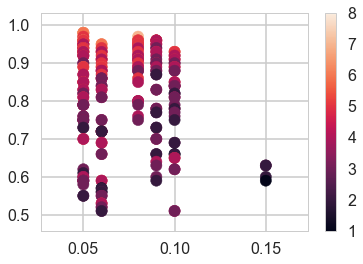

In [60]:
plt.scatter(x='Supp',y='Conf', c='N_items_Ant',  data=df_left_dict)
plt.colorbar()

# pre-filtering

In [61]:
# p
df_left_dict=df_left_dict.query('Supp>0.04 and Conf>0.50 and N_items_Ant<=20').sort_values(by=['Conf','Conf'],ascending=False)
df_left_dict.describe()

             Supp        Conf        Lift  N_items_Ant   Supp_norm
count  242.000000  242.000000  242.000000   242.000000  242.000000
mean     0.071157    0.814669    3.423182     4.136364    0.020449
std      0.021833    0.132431    0.557253     1.320914    0.014852
min      0.050000    0.510000    2.130000     1.000000    0.006250
25%      0.050000    0.730000    3.052500     3.000000    0.012000
50%      0.060000    0.850000    3.585000     4.000000    0.016667
75%      0.090000    0.930000    3.890000     5.000000    0.025000
max      0.150000    0.980000    4.100000     8.000000    0.150000

In [62]:
# rimuovo regole semanticamente non interessanti
# rimuovo le regole che contengono Work_accident:N nella parte antecedente
## selezione le row che contengono

lista_drop=[]
lista_ant=list(df_left_dict.Antecedent)

for i,ant in enumerate(lista_ant):
    #print ant
    if('Work_Accident' in ant.keys()):
        if(ant['Work_Accident']=='N'):
            lista_drop.append(i)
            #print(i)
    
df_left_dict =df_left_dict.drop(df_left_dict.index[lista_drop])
#df_left_dict.index[0]           
#df_left_dict.iloc[lista_drop[10]].Antecedent
df_left_dict.describe()

             Supp        Conf        Lift  N_items_Ant   Supp_norm
count  120.000000  120.000000  120.000000   120.000000  120.000000
mean     0.072167    0.811500    3.409833     3.650000    0.023914
std      0.022461    0.129047    0.543543     1.220621    0.018126
min      0.050000    0.550000    2.300000     1.000000    0.007143
25%      0.050000    0.727500    3.045000     3.000000    0.012500
50%      0.060000    0.840000    3.535000     4.000000    0.020000
75%      0.090000    0.920000    3.880000     4.000000    0.030000
max      0.150000    0.980000    4.100000     7.000000    0.150000

In [138]:
df_left_dict_filtered=df_left_dict.query('Supp>0.04 and Conf>0.5 and N_items_Ant<=10').sort_values(by=['Conf','N_items_Ant'],ascending=False)
df_left_dict_filtered.describe()
#df_left_dict_filtered
#df_left_dict_filtered.sort_values(by='N_items_Ant',ascending=True)
#for i in range(10):
#df_left_dict_filtered.iloc[17].Antecedent#+df_left_dict_filtered.Conf

             Supp        Conf        Lift  N_items_Ant   Supp_norm
count  120.000000  120.000000  120.000000   120.000000  120.000000
mean     0.072167    0.811500    3.409833     3.650000    0.023914
std      0.022461    0.129047    0.543543     1.220621    0.018126
min      0.050000    0.550000    2.300000     1.000000    0.007143
25%      0.050000    0.727500    3.045000     3.000000    0.012500
50%      0.060000    0.840000    3.535000     4.000000    0.020000
75%      0.090000    0.920000    3.880000     4.000000    0.030000
max      0.150000    0.980000    4.100000     7.000000    0.150000

In [139]:
# lista degli items
df_rules = df_left_dict_filtered.sort_values(by=["N_items_Ant","Conf"],ascending=False)
df_rules.describe()
df_rules.to_csv("../../data/rules/best_rules_left.csv")

In [140]:
lista_items=[]
for i in range(df_rules.shape[0]): 
    antecedent = df_rules.Antecedent.iloc[i]
    for key in antecedent.keys():
        lista_items.append( "{}:{}".format(key,antecedent[key]))

lista_items = list(set(lista_items)) # elementi unici
lista_items

['Salary:0',
 'Average_Montly_Hours:standard',
 'Satisfaction_Level:low',
 'Last_Evaluation:insufficient',
 'Average_Montly_Hours:intensive',
 'Satisfaction_Level:medium',
 'Time_Spend_Company:4',
 'Time_Spend_Company:5',
 'Promotion_Last_5_Years:N',
 'Time_Spend_Company:3',
 'Salary:1',
 'Number_Projects:2']

In [141]:
# adesso per ogni regola (riga del dataframe) voglio vedere quali elementi ci sono:1 c'è 0 non c'è
# per prima cosa dev
df = df_rules.copy()

antecedent_col=[]

for antecedent in list(df.Antecedent):
    antecedent_items=[]
    #antecedent = df.Antecedent.iloc[0]
    for key in antecedent.keys():
        antecedent_items.append( "{}:{}".format(key,antecedent[key]))    
    antecedent_col.append(antecedent_items)

df['antecedent_list']=antecedent_col
df.head()

     Supp  Conf  Lift                                         Antecedent  \
607  0.05  0.98  4.10  {u'Salary': u'0', u'Satisfaction_Level': u'med...   
614  0.05  0.98  4.10  {u'Salary': u'0', u'Satisfaction_Level': u'med...   
636  0.05  0.97  4.09  {u'Salary': u'0', u'Satisfaction_Level': u'med...   
664  0.09  0.96  4.05  {u'Satisfaction_Level': u'medium', u'Last_Eval...   
812  0.05  0.96  4.04  {u'Salary': u'0', u'Last_Evaluation': u'insuff...   

          Consequent  N_items_Ant  Supp_norm  \
607  {u'Left': u'Y'}            7   0.007143   
614  {u'Left': u'Y'}            6   0.008333   
636  {u'Left': u'Y'}            6   0.008333   
664  {u'Left': u'Y'}            6   0.015000   
812  {u'Left': u'Y'}            6   0.008333   

                                       antecedent_list  
607  [Salary:0, Satisfaction_Level:medium, Last_Eva...  
614  [Salary:0, Satisfaction_Level:medium, Last_Eva...  
636  [Salary:0, Satisfaction_Level:medium, Last_Eva...  
664  [Satisfaction_Level:m

In [142]:
# adesso controllo per ogni regola quali items ci sono
row = df.antecedent_list.iloc[0]
lista_rules=[]

for i in range(df.shape[0]):

    row = df.iloc[i]
    r1 = [] #singola regola
    #print row.antecedent_list
    
    for i,item in enumerate(lista_items): #ciclo sulla lista degli items
        r1.append(lista_items[i] in row.antecedent_list) 

    r1.append(row.Conf) # aggiungo anche la confidence
    r1.append(row.Supp) # aggiungo anche il support
    lista_rules.append(r1)

#fine
lista_rules
lista_items.append('Conf')
lista_items.append('Supp')

lista_items

['Salary:0',
 'Average_Montly_Hours:standard',
 'Satisfaction_Level:low',
 'Last_Evaluation:insufficient',
 'Average_Montly_Hours:intensive',
 'Satisfaction_Level:medium',
 'Time_Spend_Company:4',
 'Time_Spend_Company:5',
 'Promotion_Last_5_Years:N',
 'Time_Spend_Company:3',
 'Salary:1',
 'Number_Projects:2',
 'Conf',
 'Supp']

In [143]:
        
#type(lista_rules)
#len(lista_items)
df_rules_matrix = pd.DataFrame(lista_rules)#.transpose()
df_rules_matrix.columns= lista_items

df_rules_matrix.head()
## ATTENTION TO THE REORDER!!!!!
## ATTENTION TO THE REORDER!!!!!
## ATTENTION TO THE REORDER!!!!!
"""df_rules_matrix=df_rules_matrix.sort_values(by=['Conf',
    'Number_Projects:2',
                                               'Time_Spend_Company:3',
                                                'Last_Evaluation:insufficient',
                                                 'Satisfaction_Level:medium',
                                                'Promotion_Last_5_Years:N',
                                                'Salary:0'
])

"""
"""
df_rules_matrix=df_rules_matrix[['Number_Projects:2',
                                               'Time_Spend_Company:3',
                                                'Last_Evaluation:insufficient',
                                                 'Satisfaction_Level:medium',
                                                'Promotion_Last_5_Years:N',
                                'Salary:0','Conf','Supp'
                                 
]]
"""
df_rules_matrix
df_heatmap=df_rules_matrix.replace([True,False],[10,0]).transpose()
df_heatmap

                                  0      1      2      3      4      5    \
Salary:0                        10.00  10.00  10.00   0.00  10.00  10.00   
Average_Montly_Hours:standard   10.00  10.00   0.00  10.00  10.00  10.00   
Satisfaction_Level:low           0.00   0.00   0.00   0.00   0.00   0.00   
Last_Evaluation:insufficient    10.00  10.00  10.00  10.00  10.00  10.00   
Average_Montly_Hours:intensive   0.00   0.00   0.00   0.00   0.00   0.00   
Satisfaction_Level:medium       10.00  10.00  10.00  10.00   0.00  10.00   
Time_Spend_Company:4             0.00   0.00   0.00   0.00   0.00   0.00   
Time_Spend_Company:5             0.00   0.00   0.00   0.00   0.00   0.00   
Promotion_Last_5_Years:N        10.00   0.00  10.00  10.00  10.00  10.00   
Time_Spend_Company:3            10.00  10.00  10.00  10.00  10.00   0.00   
Salary:1                         0.00   0.00   0.00   0.00   0.00   0.00   
Number_Projects:2               10.00  10.00  10.00  10.00  10.00  10.00   
Conf        

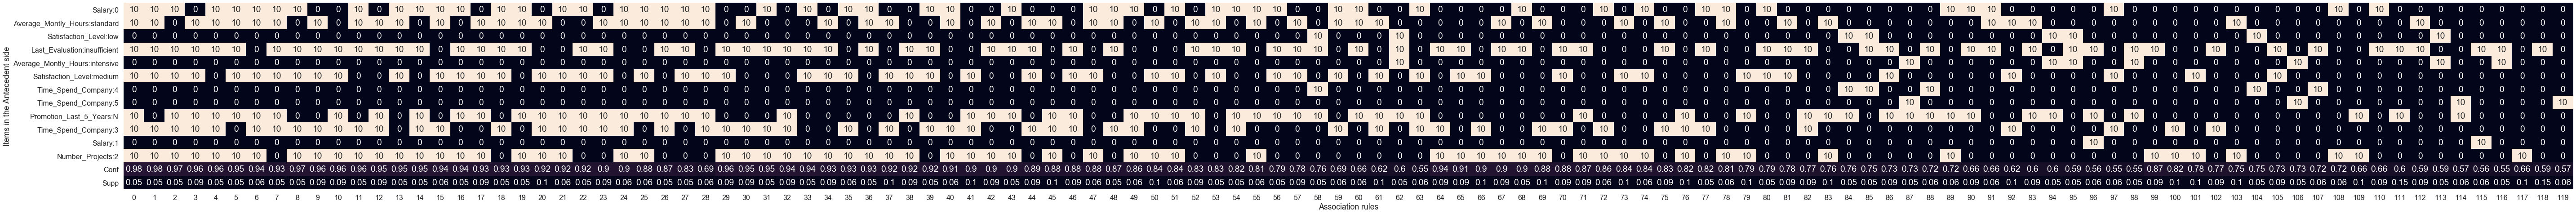

In [147]:
fig, ax = plt.subplots(figsize=(80,7))   
heat=sns.heatmap(df_heatmap,annot=True,cbar=False)
plt.xlabel('Association rules')
plt.ylabel('Items in the Antecedent side')      
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig("../../images/rules/left_heatmap.pdf")

In [123]:
df_rules.query("Conf==0.96").N_items_Ant



index_best_rule  = 664
best_rule = df_left.loc[664]
best_rule#.Antecedent
best_rule.to_csv("../../data/rules/best_rule.csv")




In [1141]:
df_rules.query('Conf>0.95').iloc[0].Antecedent

{'Average_Montly_Hours': 'standard',
 'Last_Evaluation': 'insufficient',
 'Number_Projects': '2',
 'Satisfaction_Level': 'medium',
 'Time_Spend_Company': '3'}

In [40]:
#item_dict = df_left_dict_filtered.iloc[0].Antecedent
#print item_dict


#dict2str(item_dict)


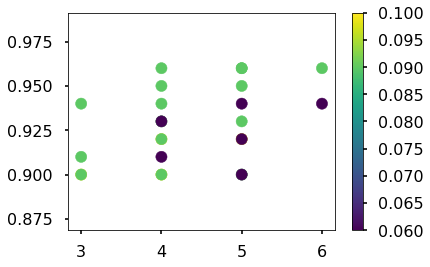

In [787]:
plt.scatter(x='N_items_Ant',y='Conf', c='Supp',  data=df_left_dict_filtered)
plt.colorbar()

In [678]:
import sys
stdout= sys.stdout
sys.stdout = open('../../data/rules/rules_left.txt','w')
print( df_left_dict_filtered.to_latex(index=False) )
sys.stdout=stdout

##?df.to_latex()



# Conversione DataFrame

In [16]:
variables = ['Time_Spend_Company',
            'Department',
            'Number_Projects',
            'Promotion_Last_5_Years',
            'Left',
            'Average_Montly_Hours',
            'Work_Accident',
            'Last_Evaluation',
            'Salary',
            'Satisfaction_Level']

other_columns = ['Antecedent','Consequent','Supp','Conf','Lift']

from copy import copy
columns = copy(variables)

for col in other_columns:
    columns.append(col)


In [18]:
var_dict = {
    'T':'Time_Spend_Company',
    'D':'Department',
    'NP':'Number_Projects',
    'P':'Promotion_Last_5_Years',
    'L':'Left',
    'H':'Average_Montly_Hours',
    'WA':'Work_Accident',
    'LE':'Last_Evaluation',
    'S':'Salary',
    'SL':'Satisfaction_Level'
}

def item2dict(item):
    ## splitto la stringa
    item_split = item.split('_')
    # definisco la lista variabile,valore
    item_list = {var_dict[item_split[1]] : item_split[0]}
    return item_list



item=df.Consequent[20]
item2dict(item)
#item

{'Promotion_Last_5_Years': 'N'}

In [520]:
item_dict = item2dict(item)

def dict2str(item_dict):
    for key in item_dict.keys():
        item_str= "{}:{}".format(key,item_dict[key])
    return item_str

dict2str(item_dict)


'Work_Accident:N'

In [521]:
# funzione che converte la parte antecedent in lista di dizionari

from ast import literal_eval

def antecedent2list(antecedent_str):
    antecedent_tuple = literal_eval(antecedent_str)

    out_list = []
    for item in antecedent_tuple:
        out_list.append(item2dict(item=item))
        
    return out_list


def antecedent2dict(antecedent_str):
    """converte la singola parte antecedente 
    in dizionario """

    antecedent_tuple = literal_eval(antecedent_str)

    out_list = {}
    for item in antecedent_tuple:
        out_list.update(item2dict(item=item))
        
    return out_list


#esempio
out= antecedent2list(df.Antecedent[45])
out2 = antecedent2dict(df.Antecedent[45])

df.Antecedent[45]

out2.keys()
out2


{'Department': '3', 'Left': 'N'}

In [ ]:
def df2df_list(df):
    """funzione che converte 
    le stringhe relative alle regole in 
    liste di dizionari """

    df_new = df.copy()

    df_new = df_new.drop(['Antecedent','Consequent'],axis=1)

    Antecedent=[]
    for i,item in enumerate(df.Antecedent):
        Antecedent.append(antecedent2list(item))

    df_new=df_new.assign(Antecedent=Antecedent)

    Consequent=[]
    for i,item in enumerate(df.Consequent):
        Consequent.append(item2dict(item))

    df_new=df_new.assign(Consequent=Consequent)
        
    return df_new        


def df2df_dict(df):
    """funzione che converte 
    le stringhe relative alle regole in 
    liste di dizionari """

    df_new = df.copy()

    df_new = df_new.drop(['Antecedent','Consequent'],axis=1)

    Antecedent=[]
    for i,item in enumerate(df.Antecedent):
        Antecedent.append(antecedent2dict(item))

    df_new=df_new.assign(Antecedent=Antecedent)

    Consequent=[]
    for i,item in enumerate(df.Consequent):
        Consequent.append(item2dict(item))

    df_new=df_new.assign(Consequent=Consequent)
        
    return df_new        



# Analisi in frequenza delle regole per LEFT

In [313]:
# converto in dizionario 
df_left_dict = df2df_dict(df_left)
#df_left_dict.head()

     Supp  Conf  Lift                                         Antecedent  \
591  0.05  0.98   4.1  {u'Salary': u'0', u'Satisfaction_Level': u'med...   
599  0.05  0.98   4.1  {u'Salary': u'0', u'Satisfaction_Level': u'med...   
607  0.05  0.98   4.1  {u'Salary': u'0', u'Satisfaction_Level': u'med...   
614  0.05  0.98   4.1  {u'Salary': u'0', u'Satisfaction_Level': u'med...   
622  0.05  0.98   4.1  {u'Salary': u'0', u'Satisfaction_Level': u'med...   

          Consequent  
591  {u'Left': u'Y'}  
599  {u'Left': u'Y'}  
607  {u'Left': u'Y'}  
614  {u'Left': u'Y'}  
622  {u'Left': u'Y'}  

In [786]:
dict_values = (df_left_dict_filtered.Antecedent.iloc[0])
#dict_values.keys()
dict_values

{'Average_Montly_Hours': 'standard',
 'Last_Evaluation': 'insufficient',
 'Number_Projects': '2',
 'Promotion_Last_5_Years': 'N',
 'Salary': '0',
 'Satisfaction_Level': 'medium',
 'Time_Spend_Company': '4'}

In [315]:

lista_items=[]
lista_counts=[]

for variable in dict_values.keys():

    print(variable)
    #lista valori associata alla variabile
    lista_values = (dict_values[variable])
    #print(lista_values)

    if (len(lista_values)==0):
        break
    
    # estraggo i valori unici:n
    uniques = [lista_values[0]] #inizializzo col primo valore
    for value in lista_values:
        if(value not in uniques):
            uniques.append(value)
    # conto i valori per ciascun item unico
    uniques_counts=[]
    for i,unique in enumerate(uniques):
        uniques_counts.append(0)
        for value in lista_values:
            if (value ==unique) :
                uniques_counts[i]+=1

    # definisco gli items e li aggiungo alla lista complessiva
    for unique in uniques:
        lista_items.append("{} : {}".format(variable,unique))

    # aggiungo i counts alla lista complessiva    
    lista_counts=lista_counts+uniques_counts

#uniques_counts
#uniques
lista_items
lista_counts

Salary
Satisfaction_Level
Last_Evaluation
Work_Accident
Number_Projects
Department


[49, 55, 65, 45, 73]

In [316]:
lista_items

['Salary : 0',
 'Satisfaction_Level : medium',
 'Last_Evaluation : insufficient',
 'Work_Accident : N',
 'Number_Projects : 2']

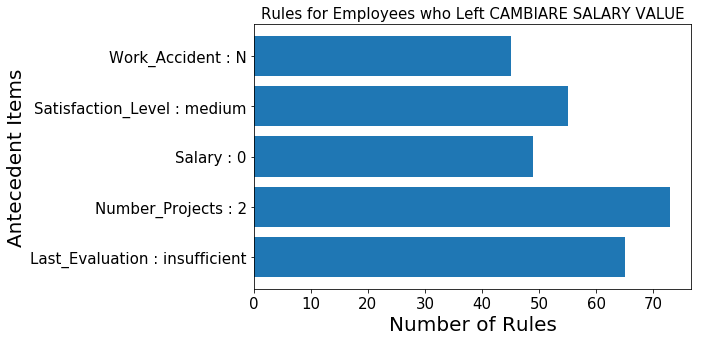

In [320]:
fig = plt.figure(figsize=(10,5))

x=lista_items
y= lista_counts
#y=np.array(lista_counts)/max(np.array(lista_counts))
plt.barh(x,y)
plt.ylabel('Antecedent Items')
plt.xlabel('Number of Rules')
plt.title('Rules for Employees who Left CAMBIARE SALARY VALUE')
plt.tight_layout()
plt.savefig("../../images/rules/rules_left.pdf")

In [300]:
prova= np.array(lista_counts)/max(np.array(lista_counts))
#max(prova)
prova

array([0, 0, 1, 0, 1])